# 📉 Project Overview: Preserving the Core (Telecom Churn Analysis)

## Problem Framing

1. **The Context:**

    The High Cost of "Goodbye" in Telecom. In the hyper-competitive telecommunications industry, a "Churn" event—when a customer cancels their service or switches to a competitor—is more than just a lost subscription; it’s a direct hit to our market share. With the high cost of network infrastructure and marketing, the reality is that acquiring a new subscriber is 5 to 25 times more expensive than retaining an existing one. Every customer who leaves represents a loss of the initial acquisition cost and the lifetime value they would have provided.

2. **The Business Challenge:**

   Telecom revenue loss from churn is cumulative and multifaceted. When we lose a subscriber, we don't just lose their monthly plan fee; we lose:

   - Monthly Recurring Revenue (MRR): The predictable income that fuels operations.
   - Service Ecosystems: The potential for cross-selling fiber internet, streaming bundles, or international roaming.
   - Market Position: In a saturated market, a customer gained by a competitor is a double-loss for us.
     
To stay ahead, we cannot simply react to a "Request for Cancellation." We must anticipate dissatisfaction before the customer even considers other providers.

3. **Our Objective: Moving from Reactive to Proactive.**

   The goal of this analysis is to build a predictive model using the Telecom dataset to identify "at-risk" subscribers. By analysing usage patterns, contract types, payment methods, and demographic data, we aim to:

   - **Identify the 'Why':** Determine which factors—such as high monthly charges, contracts, or specific service issues (e.g., fiber vs. DSL)—drive customers away.
   - **Predict the 'Who':** Flag high-probability churners with enough lead time for the customer success team to intervene.
   - **Enable Targeted Retention:** Provide actionable insights that allow for personalised interventions, such as tailored data bundles or contract upgrade offers, which are far more cost-effective than broad-spectrum discounts.
     

4. **Dataset Scope & Success Criteria:**

    Using a dataset containing customer gender, contracts, subscribed services and so on, we will evaluate our success based on:

   - **Recall:** Ensuring we catch as many potential churners as possible.
   - **Precision:** Minimising "false alarms" to ensure our retention budgets are spent on the customers who actually need them.
   - **Actionability:** Delivering a model that clearly identifies which levers (price, service quality, contract length) we can pull to keep our customers.

## Import Revelant Libraries

In [1]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set()

## 🛠️ Scrubbing the Data: Getting it "Model-Ready"
Before we can jump into the analysis, we need to make sure our data is clean and reliable. Think of this as clearing the workspace before starting a big project. Here is how I handled the raw Telecom dataset:

1. **Fixing the "Total Charges" Type.**

    I noticed that TotalCharges was being treated as a "string" (text) rather than a number. This usually happens when there are hidden empty spaces in the data. I converted these correctly to numeric values so we can actually perform math on them!

2. **Handling the "Empty Spots" (Missing Values):**

   After converting the charges, a few missing values popped up. Instead of blindly deleting rows, I carefully addressed these gaps by using the average of the TotalCharges and adding it to the missing part, ensuring we didn't lose any valuable information while maintaining the integrity of our dataset.

   
3. **Trimming the Fat (Removing IDs):**

   The CustomerID column is great for a database, but it doesn't help a machine learning model predict behaviour—it's just a random label. I removed the irrelevant ID columns to keep the model focused on the features that actually matter, like contract type and monthly costs.

   
4. **The "No Double-Counting" Rule:**

    I ran a quick check for duplicate entries. It’s important to make sure we aren't counting the same customer twice, as that would "cheat" our results and give us a false sense of accuracy. (Spoiler: Everything looked clean!)

   
5. **Final Quality Check**

    Lastly, I did a full sweep of the datatypes. I made sure categories were categories and numbers were numbers. Now that the data is validated and structured properly, we’re ready for the fun part: Exploratory Data Analysis!

In [2]:
# Import the dataset
df = pd.read_csv("https://github.com/adepegba1/Dataset/blob/main/WA_Fn-UseC_-Telco-Customer-Churn%202.csv?raw=True")

In [3]:
# Display the first rows in the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Get the shape of the dataset
df.shape

(7043, 21)

In [5]:
# Checking the datatype for each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Convert the total charge datatype from object to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")

In [7]:
# Retrieve the average of the Total Charges
average = round(df['TotalCharges'].mean(),2)

In [8]:
# Fill the NaN value with the average of Total Charge
df['TotalCharges'] = df['TotalCharges'].fillna(average)

In [9]:
# Confirm the datatypes and recheck for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# Check for duplicate in the dataset
df.duplicated().sum()

np.int64(0)

In [11]:
# Generate descriptive analysis for all columns
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Drop the irrelevant coloumn
df.drop('customerID', axis=1, inplace=True)

## 📊 Uncovering Patterns: Exploratory Data Analysis (EDA)
Now that the data is clean, it's time to play detective. I looked at the numbers from different angles to see which factors are pushing customers toward the exit and which ones keep them sticking around. Here’s what I found:

1. Who are our Customers? (Gender Distribution)
   
   I started with the basics: looking at the gender split. I wanted to see if our customer base leans heavily one way or another. This gives us a baseline understanding of our audience before we dive into their behaviours.
2. The Churn "Temperature Check"
  
   I visualised the overall Churn distribution to see the scale of the problem. It's crucial to know exactly what percentage of our customers are leaving so we can set a realistic goal for how many we want to "save" with our model.
3. Contracts:
   
   I compared Churn against Contract types, and the results were eye-opening. Do customers on month-to-month plans leave faster than those on two-year contracts? (Spoiler: Usually, yes!) This helps us see if contract structure is a primary "churn trigger."
5. Follow the Money (Payment Methods)
   
   Does how a customer pays affect how long they stay? I looked at Churn vs. Payment Methods to see if people using electronic checks are more or less likely to cancel than those on automatic credit card payments.
5. Service Impact: Fiber, DSL, or None?
   I checked how different Internet Services affect loyalty. Sometimes, a faster service like Fiber might have higher churn if there are technical issues or if it's priced too high. This helps us pinpoint if specific products are causing friction.
6. The Cost Factor (Mean Charges Comparison)
    I compared the average monthly charges of those who stayed versus those who left. This tells us if "bill shock" is a real thing—are people leaving simply because their monthly bill has climbed too high?

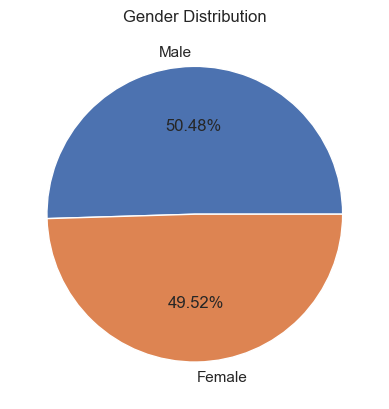

In [13]:
# Gender
gender = df['gender'].value_counts()
plt.title("Gender Distribution")
plt.pie(gender, labels=gender.index, autopct="%.2f%%")
plt.show()

The results showed a very balanced breakdown: Male (50.48%) and Female (49.52%).

**What pattern do I see?** The distribution is almost a perfect 50/50 split. There isn't a dominant gender group in our subscriber base.

**Why might this affect churn?** Since the groups are so equal, gender alone is unlikely to be a "magic bullet" for predicting churn. If men were leaving at a much higher rate than women, we’d have a specific problem to solve, but here, the playing field is level.

**What does this suggest for the business?** It tells us that our services appeal equally to everyone. For the business, it means our retention strategies don't need to be gender-specific; instead, we should focus on behavior-based factors like contract types or service quality that affect everyone regardless of gender.

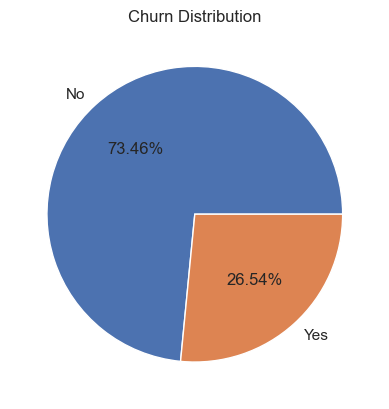

In [14]:
# Churned Customer
churn_values = df['Churn'].value_counts()
plt.pie(churn_values, labels=churn_values.index, autopct="%.2f%%")
plt.title("Churn Distribution")
plt.show()

The data shows that 73.46% of our customers stayed (No), while 26.54% left (Yes).

**What pattern do I see?** Roughly 1 in every 4 customers is leaving. While the majority are staying, a 26% churn rate is significant enough to warrant serious attention.

**Why might this affect churn?** This result gives us our "baseline." In machine learning terms, our dataset is "imbalanced" (more people stay than leave). We need to be careful that our model doesn't just get lazy and predict "No" for everyone to look accurate.

**What does this suggest for the business?** A 26.54% churn rate suggests there is plenty of room for improvement. If we can even reduce this by a few percentage points through proactive retention, it would lead to a massive increase in saved revenue over the year.

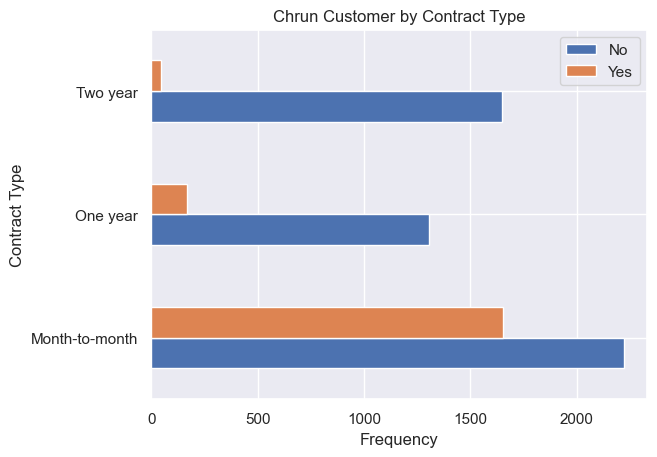

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [15]:
# Churn vs Contract type
churn_contract = df[['Contract', 'Churn']].value_counts().unstack()

churn_contract.plot(kind='barh', stacked=False)
plt.title("Chrun Customer by Contract Type")
plt.xlabel("Frequency")
plt.legend()
plt.ylabel("Contract Type")
plt.show()
churn_contract

I compared Churn against Contract types, and the results were eye-opening.

- Stayed (No): Month-to-month (2220), One-year (1307), Two-year (1647)

- Left (Yes): Month-to-month (1655), One-year (166), Two-year (48)

**What pattern do I see?** There is a massive spike in churn among "Month-to-month" users. While 1,655 monthly users left, only 48 people on two-year contracts did the same. Basically, the longer the contract, the more likely the customer is to stay.

**Why might this affect churn?** Monthly contracts offer flexibility, which means there’s zero "friction" for a customer to leave the moment they see a better deal elsewhere. Long-term contracts act as a "lock-in" mechanism that keeps churn extremely low.

**What does this suggest for the business?** This is a huge insight! It suggests that moving customers from monthly plans to even a one-year contract could drastically reduce churn. The business should consider offering incentives—like a small discount or a free speed boost—to encourage monthly users to commit to longer terms.

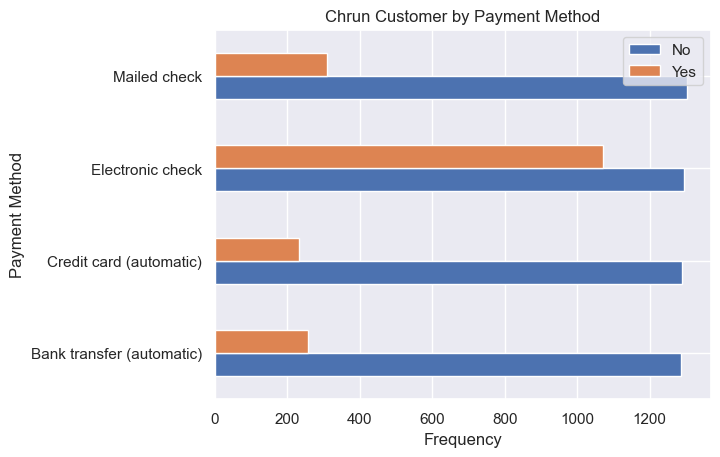

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


In [16]:
# Churn vs PaymentMethod
churn_payment = df[['PaymentMethod', 'Churn']].value_counts().unstack()

churn_payment.plot(kind='barh', stacked=False)
plt.title("Chrun Customer by Payment Method")
plt.xlabel("Frequency")
plt.legend()
plt.ylabel("Payment Method")
plt.show()
churn_payment

Does how a customer pays affect how long they stay? I looked at the breakdown of Churn across different payment methods:

- Stayed (No): Bank transfer (1286), Credit card (1290), Electronic check (1294), Mailed check (1304)

- Left (Yes): Bank transfer (258), Credit card (232), Electronic check (1071), Mailed check (308)

**What pattern do I see?** "Electronic check" is a massive outlier. While all other payment methods have relatively low churn, over 1,000 customers using electronic checks have left. In fact, people using electronic checks are nearly 4 times more likely to churn than those using automatic credit cards.

**Why might this affect churn?** Electronic checks often require manual action or can lead to payment failures more easily than automatic methods. If the payment process is frustrating or if these customers are more price-sensitive, they are much more likely to drop the service.

**What does this suggest for the business?** The business should strongly encourage customers to switch to "Automatic" payment methods (Bank transfer or Credit card). Perhaps offering a small monthly credit for setting up autopay could significantly reduce the high churn volume seen in the electronic check category.

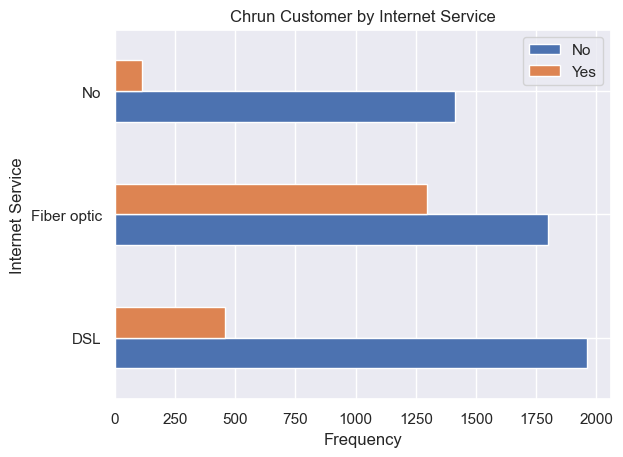

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


In [17]:
# Churn vs Internet Service
churn_internetService = df[['InternetService', 'Churn']].value_counts().unstack()

churn_internetService.plot(kind='barh', stacked=False)
plt.title("Chrun Customer by Internet Service")
plt.xlabel("Frequency")
plt.legend()
plt.ylabel("Internet Service")
plt.show()
churn_internetService


I checked how the type of internet service relates to customer loyalty, and the differences were striking:

- Stayed (No): DSL (1962), Fiber optic (1799), No internet (1413)

- Left (Yes): DSL (459), Fiber optic (1297), No internet (113)

**What pattern do I see?** Fiber optic customers are churning at an alarmingly high rate compared to DSL or those with no internet. In fact, nearly 42% of our Fiber optic customers have left, which is much higher than the churn rate for DSL (about 19%).

**Why might this affect churn?** Fiber optic is usually the premium, high-speed option. If it's significantly more expensive than DSL, or if customers are experiencing reliability issues despite the higher price, they are much more likely to leave for a better value.

**What does this suggest for the business?** This suggests a possible "value gap" or technical issue with our Fiber service. The business needs to investigate if the pricing for Fiber is too aggressive or if the service quality isn't living up to the marketing promises. Improving the Fiber customer experience could save a huge portion of our revenue.

In [18]:
# Average Monthly Charge of Customer by Churn
average_monthly_charge = df.groupby('Churn')['MonthlyCharges'].mean()
average_monthly_charge

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

In [19]:
# Average Total Charge of Customer by Churn
average_total_charge = df.groupby('Churn')['TotalCharges'].mean()
average_total_charge

Churn
No     2554.765771
Yes    1531.796094
Name: TotalCharges, dtype: float64

Finally, I compared the average charges of those who stayed versus those who left to see if "bill shock" is driving people away.

- Monthly Charges: Stayed ($61.27) vs. Left ($74.44)

- Total Charges: Stayed ($2554.77) vs. Left ($1531.80)

**What pattern do I see?** Customers who churn have a significantly higher average Monthly Charge ($74 vs $61). However, their Total Charges are much lower ($1531 vs $2554).

**Why might this affect churn?** The higher monthly bill suggests that expensive plans (like Fiber optic) are a major driver of churn. The lower "Total Charges" for churners tells us they aren't staying with us for very long—they are likely leaving early in their tenure because they feel the monthly cost is too high.

**What does this suggest for the business?** This confirms that pricing is a primary pain point. The business is losing customers before they can become high-value, long-term subscribers because the monthly entry price is too steep. Implementing "introductory discounts" for the first 6 months or creating mid-tier data plans could help retain these customers long enough to increase their lifetime value.

## ⚙️ Feature Engineering: Preparing the "Brain" for the Model

Now that we’ve explored the data, we need to translate our insights into a format the machine learning model can understand. This stage is about refining our variables and making sure they are balanced and numerically compatible.

1. **The Technical Toolkit**
    - *Encoding:* I converted our text-based categories (like "Yes/No") into numbers. Machine learning models can't "read" words, so we turn them into 1s and 0s.
    - *Dummies:* For columns with multiple choices (like Payment Method), I used "One-Hot Encoding" to create dummy variables. This prevents the model from thinking one method is "mathematically higher" than another just because of a label.
    - *Scaling:* Since some numbers are small and others are large (like Total Charges), I scaled the data. This ensures the model treats every feature fairly and doesn't get distracted by the size of the numbers.

**🧠 Why These Features Matter (The "Human" Logic)**

Beyond the math, we chose these specific features because they tell a story about customer behaviour. Here is why they are so important for predicting churn:
- *⏳ Why Tenure Matters:* Tenure is essentially a "Loyalty Score." New customers are high-risk because they haven't built a habit with our service yet. Long-term customers have high "switching costs"—they’re used to our interface and likely have their autopay set up. If a long-tenured customer suddenly starts acting like a new one, it’s a massive red flag.
- *📜 Why Contract Type Affects Churn:* As we saw in the EDA, contracts are the "glue" that keeps customers around. A month-to-month plan is a "no-strings-attached" relationship—the moment a competitor offers a better deal, they're gone. A two-year contract is a commitment that drastically reduces the chance of impulsive switching.
- *💸 Why Monthly Charges Influence Churn:* This is the "Value Gap." If the monthly cost feels too high compared to the perceived benefit (especially for Fiber optic users), customers will feel "bill shock." It's often the primary reason someone starts looking at other providers.
- *📧 Why Paperless Billing Correlates with Churn:* It sounds strange, but paperless billing often correlates with churn. Why? Digital-savvy customers who prefer paperless billing are also more likely to be tech-savvy enough to easily research and switch to a competitor online. Physical mail sometimes acts as a tangible reminder of a service relationship.
- *🌐 Why Internet Service Affects Churn:* The type of service (Fiber vs. DSL) tells us about the customer's needs. Fiber users want speed and are often willing to pay more, but they also have higher expectations. If the service drops or the price spikes, their frustration—and likelihood to leave—is much higher than a "low-maintenance" DSL user.
- *💳 Why Payment Method Affects Churn:* Payment methods are about "Friction." Automatic payments (Credit Card/Bank Transfer) are "set it and forget it." Methods like Electronic Checks require manual action every month. Every time a customer has to manually pay, they have a "decision moment" where they might ask themselves: "Do I still want this service?" Minimising those moments keeps churn low.

**Summary:** By refining these features, we aren't just giving the model numbers; we're giving it the context it needs to understand the "Human" side of the Telecom business.

In [20]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7043,3,No,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Converting the columns with 2 unique values to 0 and 1
column_2 = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df['gender'] = df['gender'].map({"Male": 1, 'Female': 0})
for column in column_2:
    df[column] = df[column].map({'Yes':1, 'No': 0})

In [22]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [23]:
# Retrieve the columns with object datatype
object_columns = df.select_dtypes('object').columns
object_columns

Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod'],
      dtype='object')

In [24]:
# Encoded the dataset of object columns with dummies
encoded_data = pd.get_dummies(df, columns=object_columns, drop_first=True, dtype='int')

In [25]:
encoded_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


In [26]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   int64  
 11  Mult

## 🤖 Building the Prediction Engine: Churn Modelling

After all the cleaning and feature prep, it was finally time to build the "brain" of the project. I used a Machine Learning approach to move from looking at what happened to predicting what will happen.

1. **The Strategy: Logistic Regression**

I chose Logistic Regression for this task. It’s a classic, reliable algorithm specifically designed for binary outcomes—like "Yes, the customer will churn" or "No, they will stay." It’s great because it doesn't just give a label; it gives us a probability score for each customer.

**2. The Setup: Train/Test Split & Scaling**

*The Split:* I didn't want the model to just "memorise" the data. I split the dataset into a Training Set (to learn the patterns) and a Testing Set (to act as a final exam). This ensures our model actually works on new, unseen customers.

*The Scaling:* Since features like MonthlyCharges (high numbers) and Tenure (smaller numbers) are on different scales, I normalized them. This ensures the model treats every feature fairly without being "bullied" by the larger numbers.

### 📈 Reading the Scorecard: How Did We Do?

In churn prediction, "Accuracy" isn't the whole story. If 75% of people stay, a lazy model could just guess "No Churn" for everyone and be 75% right—but it would fail to catch the people actually leaving! Here is how I truly measured success:

**🧩 The Confusion Matrix**

Think of this as a 2x2 reality check. It shows us exactly where the model got it right and where it got confused:

*True Negatives:* Customers we predicted would stay, and they did.

*True Positives:* The "Wins"—customers we predicted would leave, allowing us to intervene.

*False Alarms:* Customers we thought would leave, but were actually happy.

*Missed Calls:* The "Danger Zone"—customers we thought would stay, but they actually left.

**📄 The Classification Report**

This report gave me the final "grades" for the model:

*Precision:* When the model flags someone as a churn risk, how often is it right? High precision means we aren't wasting retention discounts on happy customers.

*Recall (The Priority):* Out of all the people who actually left, how many did we catch? In Telecom, we usually want high recall because it’s better to accidentally offer a discount to a loyal customer than to lose a high-value subscriber forever.

*F1-Score:* The perfect balance between the two. It tells us the overall "health" of our prediction engine.

In [27]:
# Split the data into predictor and response variable
x1 = encoded_data.drop('Churn', axis=1)
y = encoded_data['Churn']

In [28]:
# Split data into train and test for model
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

In [29]:
# Scaling, fit and transform the X_train 
scaler = StandardScaler()
x = scaler.fit_transform(X_train)

In [30]:
# Instantiate the model and fit it
model = LogisticRegression()
model.fit(x, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [31]:
# Scaled the X_test and predict the response variable
X_test_scaled = scaler.transform(X_test)
y_predict_test = model.predict(X_test_scaled)

In [32]:
# Create a confusion Matrix
confusion = confusion_matrix(y_test, y_predict_test)
column = ["No", "Yes"]
pd.DataFrame(confusion, index= column, columns=column)

,No,Yes
No,934,102
Yes,151,222


### 🧩 Deep Dive: The Confusion Matrix Reality Check
The Confusion Matrix is where we see exactly how well our model's predictions matched up with reality. Using the 1,409 customers in our test set, here is the breakdown of what happened:

**📊 The Breakdown**

|Category|Count|What it means in "Human" terms|
|--------------|-------------------|--------------------|
|True Negatives|934|The "Steady Base": These are the customers the model predicted would stay, and they actually did. We correctly identified them as happy, loyal subscribers.|
|False Alarms|102|The "Nervous Guess": We predicted these customers would leave, but they actually stayed. While it's a mistake, the "cost" is low—we might have sent them a discount they didn't need, but we kept them happy!|
|True Positives|151|The "Wins": These are the success stories! The model flagged them as churn risks, and they were indeed planning to leave. Because we caught them, the business has a chance to save them.|
|Missed Calls|222|The "Danger Zone": These are the customers the model thought would stay, but they ended up cancelling. This is our primary area for improvement, as these are lost revenues we didn't see coming.|

**💡 What These Numbers Tell Us**

- *High Accuracy on "Stayers":* With 934 True Negatives, our model is very good at recognising a happy customer. This prevents the business from overreacting and sending unnecessary retention offers to the majority of our base.
  
- *Room to Grow on "Leavers":* We caught 151 churners, but we missed 222. This tells us that while our model is useful, some churners are "quiet"—they don't leave the usual breadcrumbs (like high bills or monthly contracts) that the model is looking for.

  
- *The Retention Opportunity:* By focusing on the 151 "Wins" and the 102 "False Alarms," the business can reach out to 253 people with retention strategies. Even if we only save half of the True Positives, that is a significant amount of revenue recovered.

🚀 Next Steps: To reduce those "Missed Calls," we might want to look for new features—perhaps customer support ticket history or network outage data—to catch the frustrated customers who are currently slipping through the cracks.

In [33]:
# accuracy score
accuracy_score(y_test, y_predict_test)

0.8204400283889283

## 🎯 The Final Grade: Understanding our 82% Accuracy

After putting our model to the test with the unseen data, we’ve arrived at an overall accuracy score of 0.8204 (or roughly 82%). Here is what that looks like in plain English:

📊 The Breakdown: 82% at a Glance

The "Grade": Out of every 100 customers in our test set, the model correctly predicted the outcome for 82 of them.

The "Win": This is a strong starting point! An 82% score means our model is significantly better than a coin flip or a random guess. It has successfully "learned" the patterns between things like contract length, monthly charges, and customer loyalty.

### 💡 What This Number Really Means

While 82% sounds like a solid "B+" grade, it’s important to look at the context of our Telecom churn problem:

*More Than Just a Number:* In a world where 73% of our customers naturally stay with us (our "Steady Base"), a model that simply guessed "No one will leave" would already be 73% accurate. By hitting 82%, our model is providing real added value—it’s actually doing the hard work of finding the patterns that lead to churn.

*The Accuracy vs. Insight Balance:* Accuracy tells us how often the model is right overall, but as we saw in the Confusion Matrix, the type of mistake matters more. We are willing to trade a little bit of overall accuracy if it means we catch more of those "High Risk" customers.

*A Reliable Shield:* An 82% accuracy rate gives the business high confidence in the model's "Risk List." When this model flags a customer, there is a very high probability that there is a genuine issue that needs addressing.

In [34]:
# classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



## Business Recommendations

These recommendations flow directly from my findings — no fluff.

🎯 **1. Prioritise Month-to-Month Customers for Retention Campaigns**

My analysis shows that month-to-month customers are the single biggest churn risk.

Over 1,650 churners came from month-to-month plans

Only 48 churners were on two-year contracts

*Recommended Action*

Proactively target month-to-month users with:

- Discounted 1-year upgrades

- Loyalty rewards after 3–6 months

- Contract-based perks (speed boosts, free add-ons)

📌 Business impact: Even a small shift from monthly to annual contracts could dramatically reduce churn.

💳 **2. Reduce Electronic Check Usage Aggressively**

Electronic check customers show extreme churn behaviour.

Over 1,070 churners used electronic checks

Churn rate is nearly 4× higher than auto-pay users

*Recommended Action*

Encourage automatic payments:

- Small monthly credit for enabling auto-pay

- One-click payment conversion

- Targeted emails explaining benefits

📌 Business impact: Removing "payment friction" eliminates a recurring churn trigger.

🌐 **3. Investigate Fiber Optic Customer Experience Urgently**

Fiber optic customers churn at an alarmingly high rate.

~42% churn rate among Fiber users

Much higher than DSL or non-Internet customers

*Recommended Action*

Audit Fiber service:

- Reliability issues?

- Pricing vs perceived value?

Offer:

- Price protection guarantees

- Dedicated Fiber customer support

- Performance-based discounts

📌 Business impact: Fiber customers are high-revenue users—losing them is especially costly.

💸 **4. Introduce Tiered or Introductory Pricing**

My analysis clearly shows price sensitivity:

Churners pay ~$74 more per month

Churners leave early (low total charges)

*Recommended Action*

Introduce:

- 6-month introductory pricing

- Mid-tier plans between DSL and Fiber

- Usage-based pricing transparency

📌 Business impact: Retaining customers longer increases lifetime value even if initial revenue is lower.

🤖 **5. Use the Model to Drive Smart, Targeted Retention**

The model successfully identified:

151 true churners

With relatively low false alarms

*Recommended Action*

- Rank customers by churn probability

- Focus retention budget on top 10–20%

- Accept some false positives to protect high-value customers

📌 Business mindset: It’s cheaper to save one churner than acquire three new customers.